# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

!py -m pip install matplotlib
!py -m pip install seaborn
!py -m pip install scikit-learn

#### Importar a Base de dados

In [1]:
import pandas as pd

In [2]:
advertising = pd.read_csv('./advertising.csv')

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

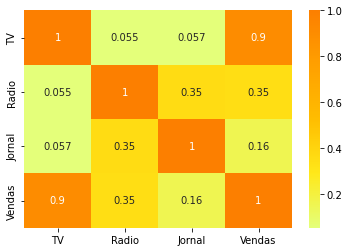

In [4]:
sns.heatmap(advertising.corr(), cmap='Wistia', annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# data used as args
x = advertising[['TV', 'Radio', 'Jornal']]
# what I want to predict
y = advertising['Vendas']

# split data to training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # random_state=1 and shuffle runs only one time

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# create model
linear_regression_model = LinearRegression()
random_forest_regressor_model = RandomForestRegressor()

# train AI
linear_regression_model.fit(x_train, y_train)
random_forest_regressor_model.fit(x_train, y_train)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [8]:
from sklearn import metrics

In [9]:
# find best model

linear_regression_prediction = linear_regression_model.predict(x_test)
random_forest_regressor_prediction = random_forest_regressor_model.predict(x_test)

display(
    metrics.r2_score(y_test, linear_regression_prediction),
    metrics.r2_score(y_test, random_forest_regressor_prediction)
)

0.8516452182286675

0.924111171850978

#### Visualização Gráfica das Previsões

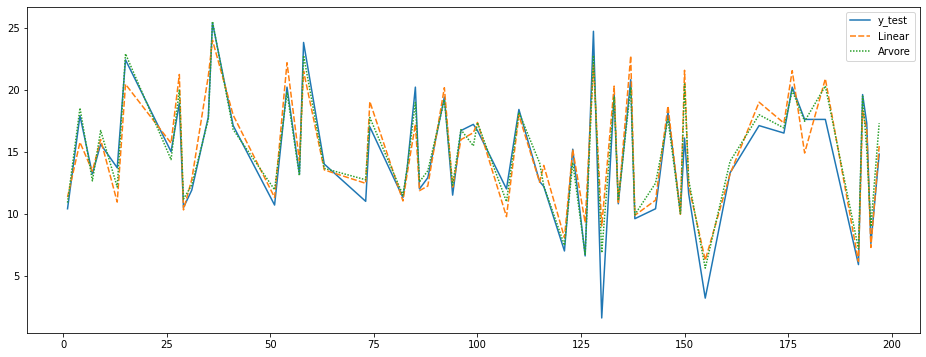

In [10]:
visualization = pd.DataFrame()
visualization['y_test'] = y_test
visualization['Linear'] = linear_regression_prediction
visualization['Arvore'] = random_forest_regressor_prediction
plt.figure(figsize=(16, 6))
sns.lineplot(data=visualization)
plt.show()

#### Como fazer uma nova previsão?

In [11]:
new_advertising = pd.read_csv('./novos.csv')

prediction = random_forest_regressor_model.predict(new_advertising)
prediction = pd.DataFrame(prediction)
display(
    new_advertising,
    prediction
)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


,0
0,7.597
1,9.522
2,19.815
